In [23]:
#!pip install pandas matplotlib seaborn --quiet

# Comparación de Modelos de Predicción de Regalías por Artista
### Tesis de Maestría en Ciencia de Datos
Este notebook unifica y compara las métricas de desempeño de los modelos SARIMAX, XGBoost, Prophet y LSTM.
Se analizan métricas como RMSE, MAPE y se generan visualizaciones para evaluar el mejor modelo por artista.

In [24]:
import pandas as pd

# Cargar cada archivo de métricas
sarimax = pd.read_csv("sarimax_metrics_por_artista.csv")
xgboost = pd.read_csv("xgboost_metrics_por_artista.csv")
prophet = pd.read_csv("prophet_metrics_por_artista.csv")
lstm = pd.read_csv("lstm_metrics_por_artista.csv")

# Unir todos
df_modelos = pd.concat([sarimax, xgboost, prophet, lstm], ignore_index=True)
df_modelos.head()

,Artist_ID,Modelo,MSE,MAE,RMSE,MAPE
0,A01,SARIMAX,9.958072e+06,2709.233157,3155.641232,0.647276
1,A02,SARIMAX,1.957465e+07,3326.695329,4424.324721,0.483066
2,A03,SARIMAX,7.648162e+10,244088.767907,276553.101582,0.345814
3,A04,SARIMAX,1.667231e+06,1048.886194,1291.212895,0.470946
4,A05,SARIMAX,4.174349e+09,58968.899346,64609.203899,0.154696


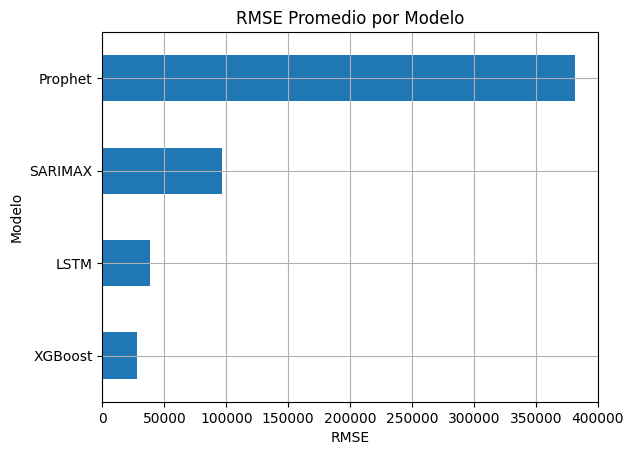

In [25]:
# RMSE promedio por modelo
df_modelos.groupby("Modelo")["RMSE"].mean().sort_values().plot(kind="barh", title="RMSE Promedio por Modelo")
import matplotlib.pyplot as plt
plt.xlabel("RMSE")
plt.grid(True)
plt.show()

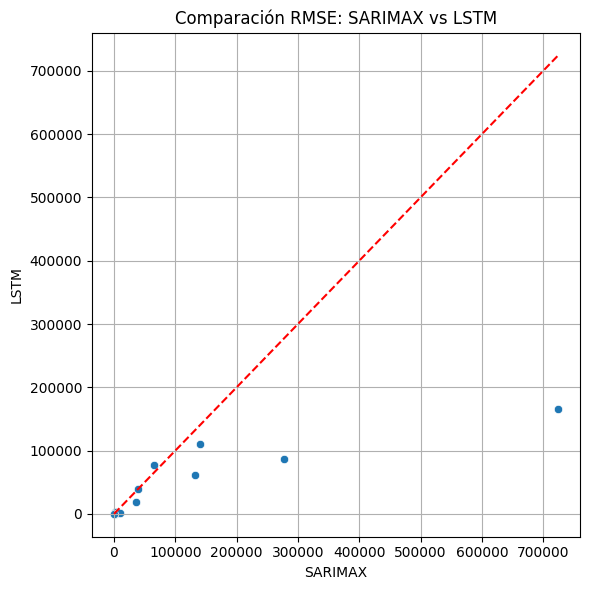

In [26]:
import seaborn as sns

# Comparación SARIMAX vs LSTM
sarimax_rmse = sarimax.set_index("Artist_ID")["RMSE"]
lstm_rmse = lstm.set_index("Artist_ID")["RMSE"]

comparativa = pd.DataFrame({
    'SARIMAX': sarimax_rmse,
    'LSTM': lstm_rmse
}).dropna()

plt.figure(figsize=(6,6))
sns.scatterplot(x="SARIMAX", y="LSTM", data=comparativa)
plt.plot([comparativa.min().min(), comparativa.max().max()],
         [comparativa.min().min(), comparativa.max().max()], 'r--')
plt.title("Comparación RMSE: SARIMAX vs LSTM")
plt.grid(True)
plt.tight_layout()
plt.show()

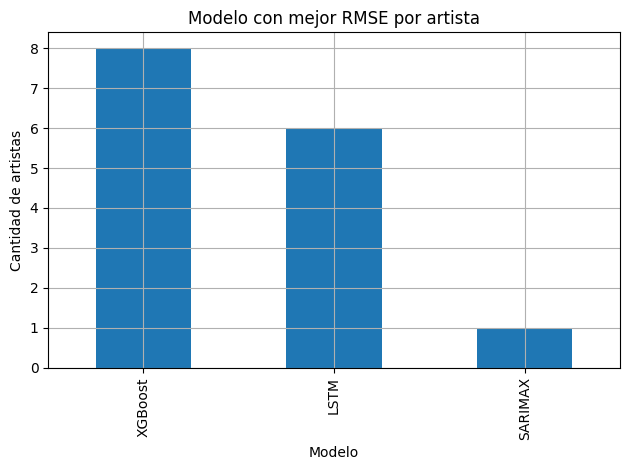

In [27]:
# Mejor modelo por artista (menor RMSE)
mejor_modelo = df_modelos.loc[df_modelos.groupby("Artist_ID")["RMSE"].idxmin()]
conteo = mejor_modelo["Modelo"].value_counts()
conteo.plot(kind="bar", title="Modelo con mejor RMSE por artista")
plt.ylabel("Cantidad de artistas")
plt.grid(True)
plt.tight_layout()
plt.show()

## Comparación por MAPE

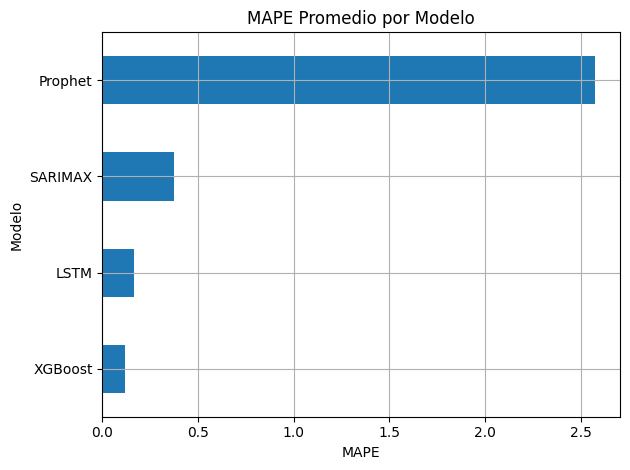

In [28]:
df_modelos.groupby("Modelo")["MAPE"].mean().sort_values().plot(kind="barh", title="MAPE Promedio por Modelo")
plt.xlabel("MAPE")
plt.grid(True)
plt.tight_layout()
plt.show()

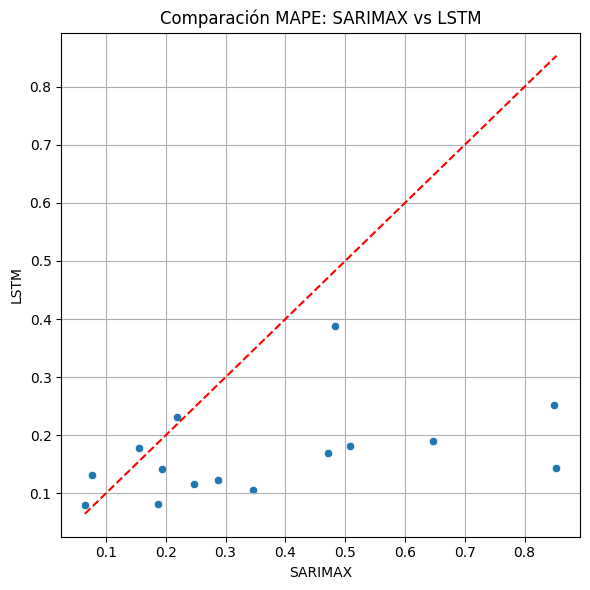

In [29]:
sarimax_mape = sarimax.set_index("Artist_ID")["MAPE"]
lstm_mape = lstm.set_index("Artist_ID")["MAPE"]

comparativa_mape = pd.DataFrame({
    'SARIMAX': sarimax_mape,
    'LSTM': lstm_mape
}).dropna()

plt.figure(figsize=(6,6))
sns.scatterplot(x="SARIMAX", y="LSTM", data=comparativa_mape)
plt.plot([comparativa_mape.min().min(), comparativa_mape.max().max()],
         [comparativa_mape.min().min(), comparativa_mape.max().max()], 'r--')
plt.title("Comparación MAPE: SARIMAX vs LSTM")
plt.grid(True)
plt.tight_layout()
plt.show()

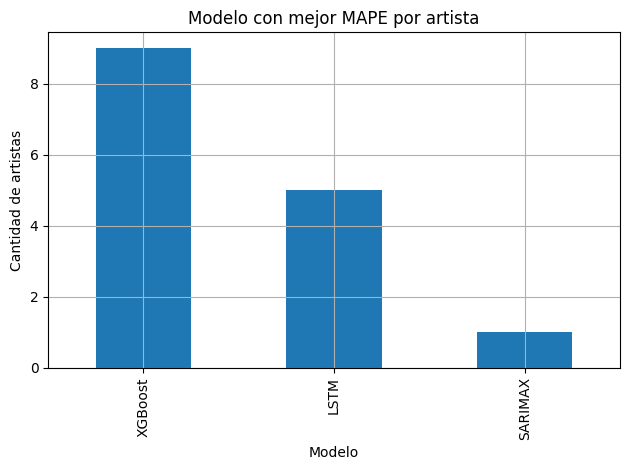

In [30]:
mejor_modelo_mape = df_modelos.loc[df_modelos.groupby("Artist_ID")["MAPE"].idxmin()]
conteo_mape = mejor_modelo_mape["Modelo"].value_counts()
conteo_mape.plot(kind="bar", title="Modelo con mejor MAPE por artista")
plt.ylabel("Cantidad de artistas")
plt.grid(True)
plt.tight_layout()
plt.show()

## Ranking general por artista (basado en RMSE)

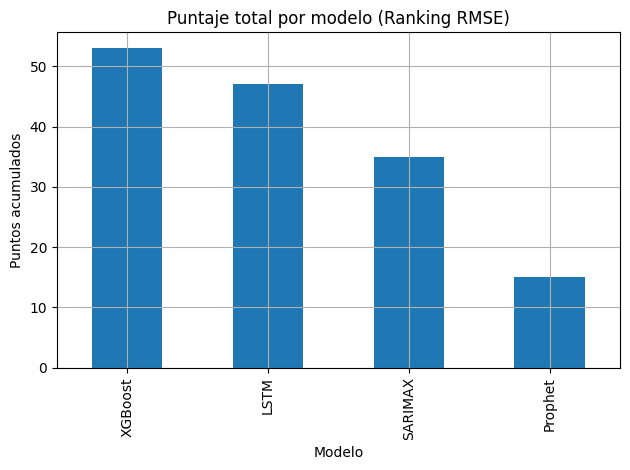

In [31]:
# Asignar puntos por posición (menor RMSE = mejor)
ranking_rmse = df_modelos.copy()
ranking_rmse["ranking"] = ranking_rmse.groupby("Artist_ID")["RMSE"].rank(method="min")
ranking_rmse["puntos"] = 5 - ranking_rmse["ranking"]  # 1° lugar = 4 pts, 4° = 1
puntos_totales = ranking_rmse.groupby("Modelo")["puntos"].sum().sort_values(ascending=False)

# Gráfico de puntaje acumulado por modelo
puntos_totales.plot(kind="bar", title="Puntaje total por modelo (Ranking RMSE)")
plt.ylabel("Puntos acumulados")
plt.grid(True)
plt.tight_layout()
plt.show()

Metricas Consolidadas

In [32]:
# Cargar los archivos
sarimax_df = pd.read_csv('sarimax_metrics_por_artista.csv')
lstm_df = pd.read_csv('lstm_metrics_por_artista.csv')
xgboost_df = pd.read_csv('xgboost_metrics_por_artista.csv')
prophet_df = pd.read_csv('prophet_metrics_por_artista.csv')


# Unir todos los DataFrames
df_consolidado = pd.concat([sarimax_df, lstm_df, xgboost_df, prophet_df], ignore_index=True)

# Guardar el DataFrame consolidado en un archivo Excel
df_consolidado.to_excel('modelos_prediccion_consolidado.xlsx', index=False)

In [33]:
df_consolidado

,Artist_ID,Modelo,MSE,MAE,RMSE,MAPE
0,A01,SARIMAX,9.958072e+06,2.709233e+03,3.155641e+03,0.647276
1,A02,SARIMAX,1.957465e+07,3.326695e+03,4.424325e+03,0.483066
2,A03,SARIMAX,7.648162e+10,2.440888e+05,2.765531e+05,0.345814
3,A04,SARIMAX,1.667231e+06,1.048886e+03,1.291213e+03,0.470946
4,A05,SARIMAX,4.174349e+09,5.896890e+04,6.460920e+04,0.154696
5,A06,SARIMAX,1.287214e+09,2.882970e+04,3.587776e+04,0.187388
6,A07,SARIMAX,1.976764e+10,1.331945e+05,1.405974e+05,0.193277
7,A08,SARIMAX,4.181177e+06,1.803144e+03,2.044793e+03,0.076143
8,A09,SARIMAX,1.123746e+07,3.076418e+03,3.352232e+03,0.218515
9,A10,SARIMAX,4.378150e+07,6.138252e+03,6.616759e+03,0.507850


In [34]:
import numpy as np

# Evitar divisiones por cero
df_consolidado['Peso_estimado'] = np.where(df_consolidado['MAPE'] > 0, df_consolidado['MAE'] / df_consolidado['MAPE'], 0)

# Normalizar los pesos por modelo
df_consolidado['Peso_normalizado'] = df_consolidado.groupby('Modelo')['Peso_estimado'].transform(lambda x: x / x.sum())

# Calcular MAPE ponderado
df_consolidado['MAPE_ponderado'] = df_consolidado['MAPE'] * df_consolidado['Peso_normalizado']

# Agrupar y calcular métricas finales
resumen_ponderado = df_consolidado.groupby('Modelo').agg({
    'MSE': 'mean',
    'MAE': 'mean',
    'RMSE': 'mean',
    'MAPE_ponderado': 'sum'  # ya está ponderado
}).reset_index()

# Renombrar columna
resumen_ponderado = resumen_ponderado.rename(columns={'MAPE_ponderado': 'MAPE'})

# Redondear y exportar
resumen_ponderado = resumen_ponderado.round(6)
resumen_ponderado.to_csv('Resumen_Promedio_por_Modelo.csv', index=False)


In [35]:
#resumen_ponderado.head()
resumen_ponderado.sort_values(by="MAPE", ascending=True)


,Modelo,MSE,MAE,RMSE,MAPE
3,XGBoost,1.944624e+09,23469.640926,27677.156357,0.100221
0,LSTM,3.940704e+09,33832.914043,38400.619950,0.145448
2,SARIMAX,4.299141e+10,73931.571647,96294.731816,0.328200
1,Prophet,3.795615e+11,333211.735898,381284.757315,1.476118


In [36]:
# Paso 1: Obtener el modelo con menor MAPE por artista
mejor_modelo_por_artista = df_consolidado.loc[
    df_consolidado.groupby('Artist_ID')['MAPE'].idxmin()
]

# Paso 2: Seleccionar columnas clave
resumen_por_artista = mejor_modelo_por_artista[[
    'Artist_ID', 'Modelo', 'MAPE', 'RMSE', 'MAE', 'MSE'
]].reset_index(drop=True)

# (Opcional) Renombrar columnas para presentación
resumen_por_artista = resumen_por_artista.rename(columns={
    'Artist_ID': 'Artista_ID',
    'Modelo': 'Mejor_Modelo',
    'MAPE': 'MAPE_Minimo'
})

# Exportar
resumen_por_artista.to_csv('Mejor_Modelo_Por_Artista.csv', index=False)


In [37]:
resumen_por_artista

,Artista_ID,Mejor_Modelo,MAPE_Minimo,RMSE,MAE,MSE
0,A01,XGBoost,0.155089,850.595370,658.276537,7.235125e+05
1,A02,XGBoost,0.057550,527.828863,407.399685,2.786033e+05
2,A03,LSTM,0.105780,86927.789633,78134.716000,7.556441e+09
3,A04,LSTM,0.168974,426.028679,356.537491,1.815004e+05
4,A05,XGBoost,0.114675,55285.114861,47146.021111,3.056444e+09
5,A06,LSTM,0.081858,18543.592498,14010.690625,3.438648e+08
6,A07,XGBoost,0.127802,104395.063820,89939.140556,1.089833e+10
7,A08,SARIMAX,0.076143,2044.792722,1803.144011,4.181177e+06
8,A09,XGBoost,0.149702,2158.343643,1869.355954,4.658447e+06
9,A10,XGBoost,0.070735,949.311219,869.053917,9.011918e+05


Predicciones Consolidadas

In [38]:
sarimax_df = pd.read_csv('sarimax_predicciones_para_powerbi.csv')
lstm_df = pd.read_csv('lstm_predicciones_para_powerbi.csv')
xgboost_df = pd.read_csv('xgboost_predicciones_para_powerbi.csv')
prophet_df = pd.read_csv('prophet_predicciones_para_powerbi.csv')

# Unir todos los DataFrames
df_consolidado = pd.concat([sarimax_df, lstm_df, xgboost_df, prophet_df], ignore_index=True)

# Guardar el DataFrame consolidado en un archivo Excel
df_consolidado.to_excel('Predicciones_para_PBI.xlsx', index=False)

Forecasts Consolidados

In [39]:
sarimax_df = pd.read_csv('sarimax_forecast_royalties_artistas.csv')
lstm_df = pd.read_csv('lstm_forecast_royalties_artistas.csv')
xgboost_df = pd.read_csv('xgboost_forecast_royalties_artistas.csv')
prophet_df = pd.read_csv('prophet_forecast_royalties_artistas.csv')

# Añadir columna para identificar el modelo
sarimax_df['modelo'] = 'SARIMAX'
lstm_df['modelo'] = 'LSTM'
xgboost_df['modelo'] = 'XGBoost'
prophet_df['modelo'] = 'Prophet'

# Unir todos los DataFrames
df_consolidado = pd.concat([sarimax_df, lstm_df, xgboost_df, prophet_df], ignore_index=True)

df_consolidado.to_csv('Forecast_de_modelos_por_artista.csv', index=False)

## Graficos para Documentacion

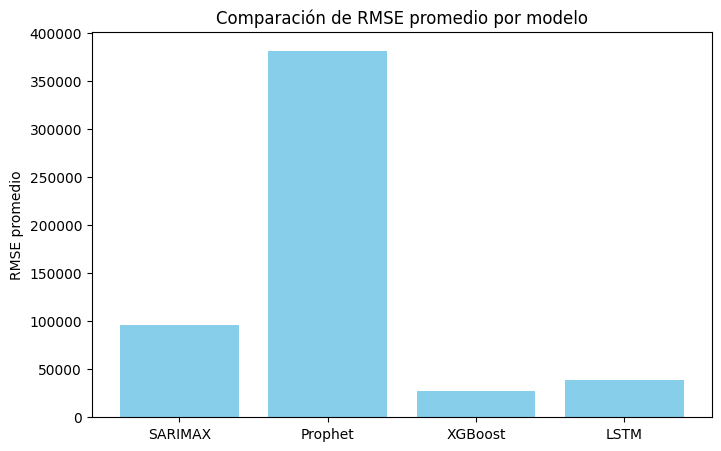

<Figure size 800x500 with 0 Axes>

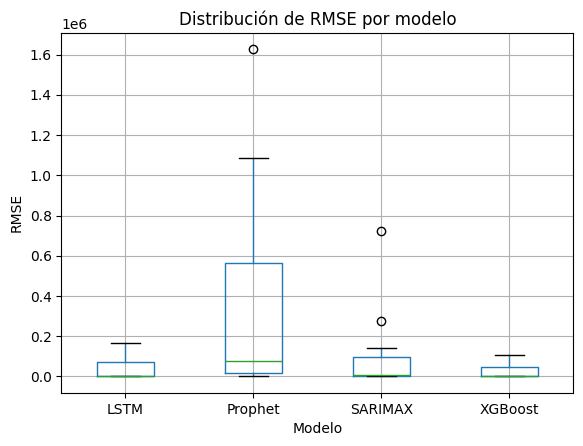

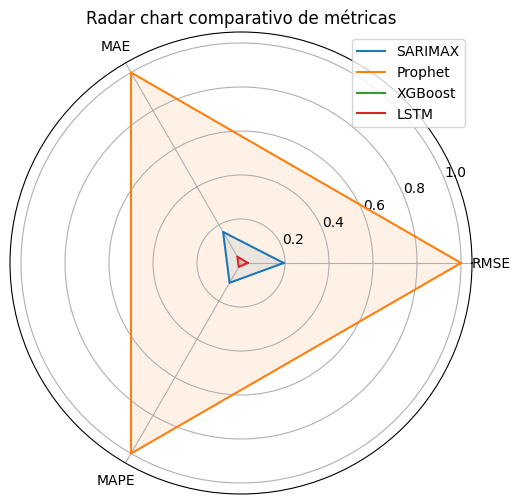

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar tus CSV con métricas por artista y modelo
sarimax = pd.read_csv("sarimax_metrics_por_artista.csv")
prophet = pd.read_csv("prophet_metrics_por_artista.csv")
xgboost = pd.read_csv("xgboost_metrics_por_artista.csv")
lstm = pd.read_csv("lstm_metrics_por_artista.csv")

# Consolidar en un solo DataFrame (ejemplo con RMSE, MAE, MAPE, R2)
modelos = {
    "SARIMAX": sarimax,
    "Prophet": prophet,
    "XGBoost": xgboost,
    "LSTM": lstm
}

df_resumen = pd.DataFrame([
    {
        "Modelo": nombre,
        "RMSE": datos["RMSE"].mean(),
        "MAE": datos["MAE"].mean(),
        "MAPE": datos["MAPE"].mean()
    }
    for nombre, datos in modelos.items()
])

# --- Gráfico de barras comparativo (RMSE global) ---
plt.figure(figsize=(8,5))
plt.bar(df_resumen["Modelo"], df_resumen["RMSE"], color="skyblue")
plt.title("Comparación de RMSE promedio por modelo")
plt.ylabel("RMSE promedio")
plt.show()

# --- Boxplot de errores por modelo (ejemplo RMSE) ---
df_boxplot = pd.concat([
    datos[["RMSE"]].assign(Modelo=nombre)
    for nombre, datos in modelos.items()
])
plt.figure(figsize=(8,5))
df_boxplot.boxplot(column="RMSE", by="Modelo")
plt.title("Distribución de RMSE por modelo")
plt.suptitle("")
plt.ylabel("RMSE")
plt.show()

# --- Radar chart ---
import numpy as np

# Normalización para que todas las métricas sean comparables en el radar
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

metrics = ["RMSE", "MAE", "MAPE"]
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)

for _, row in df_resumen.iterrows():
    values = []
    for m in metrics:
        # Normalizar la columna y extraer el valor correspondiente al índice del modelo
        norm_col = normalize(df_resumen[m])
        values.append(norm_col.loc[row.name])
    values += values[:1]
    ax.plot(angles, values, label=row["Modelo"])
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
plt.title("Radar chart comparativo de métricas")
plt.legend(loc="upper right")
plt.show()
